# Breast Cancer Classification Notebook

## Introduction
In this notebook, we will explore the Breast Cancer Wisconsin (Diagnostic) dataset and build a classification model to predict whether a breast tumor is malignant (cancerous) or benign (non-cancerous). The dataset contains various features derived from breast tumor samples.

## Data Loading and Overview

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import joblib
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, classification_report, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv('breast-cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Check the dimensions of the dataset
print("Dataset Dimensions:", data.shape)

Dataset Dimensions: (569, 32)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Exploratory Data Analysis (EDA)

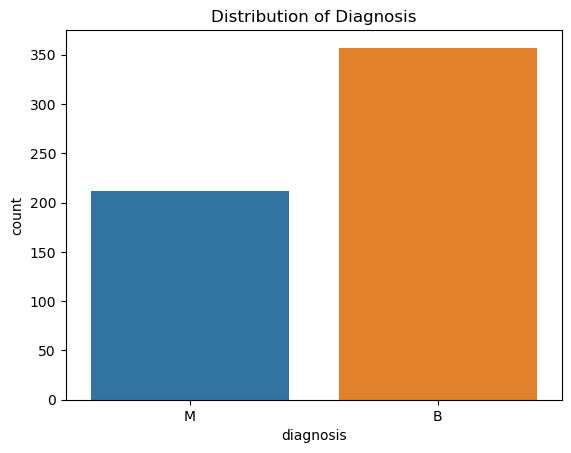

In [7]:
# Check the distribution of the target variable
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

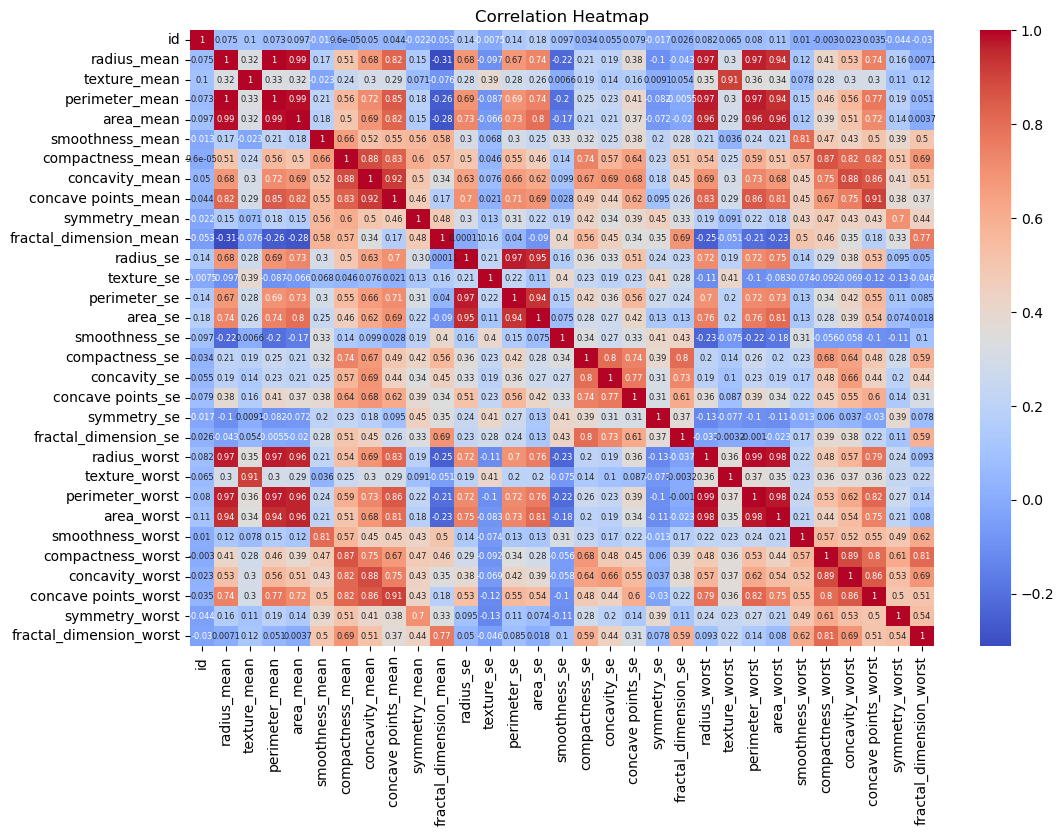

In [8]:
# Check the correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', annot_kws={'fontsize': 6})
plt.title('Correlation Heatmap')
plt.show()

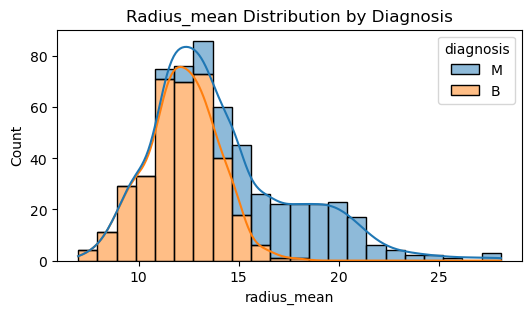

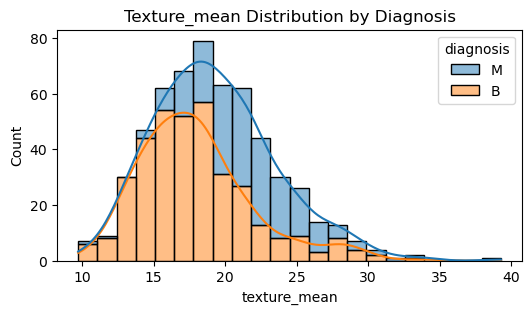

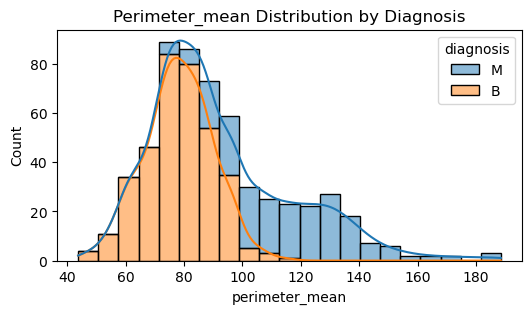

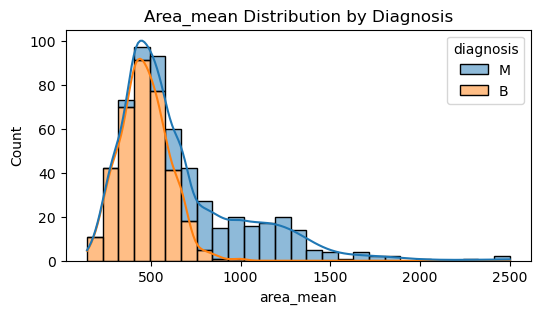

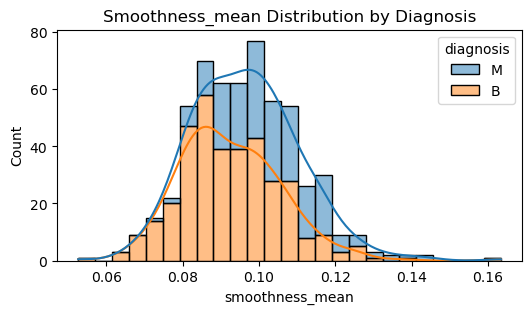

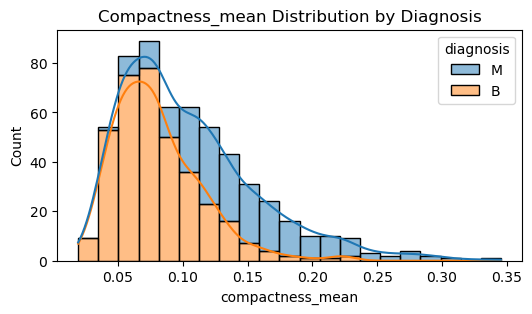

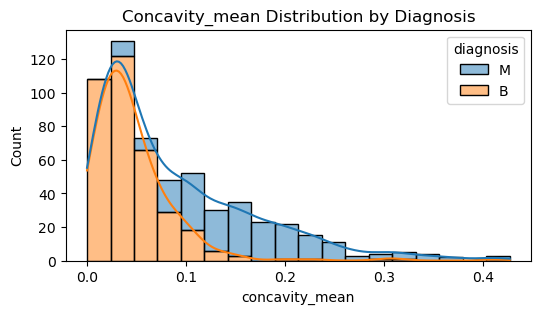

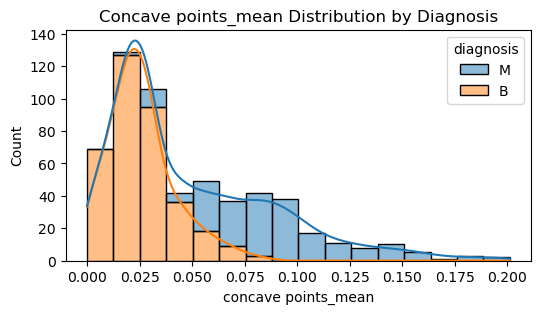

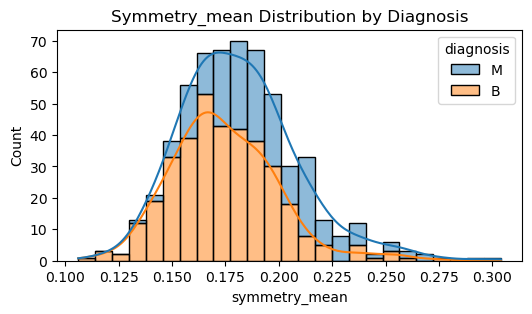

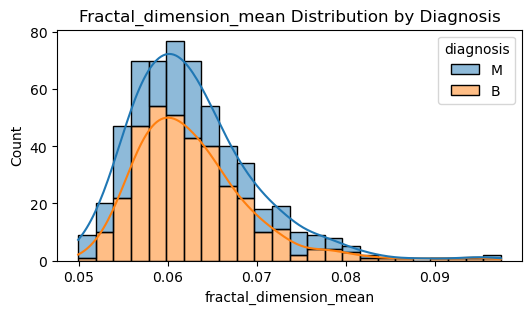

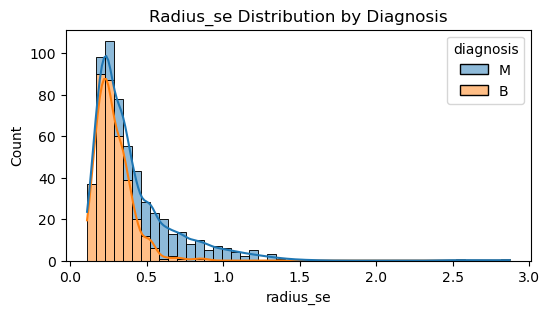

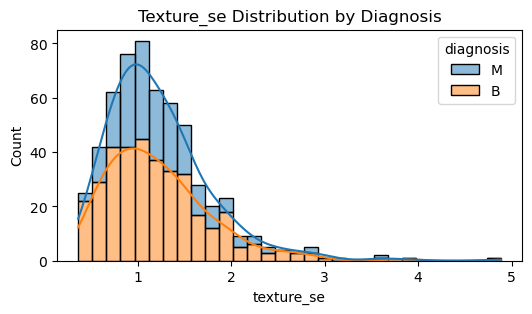

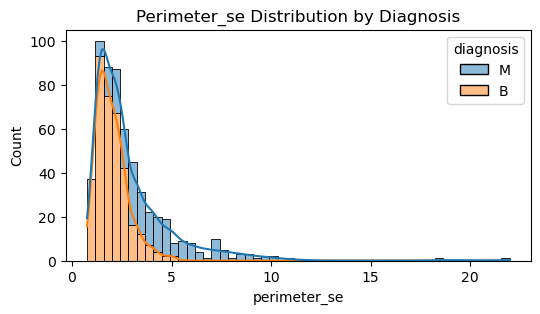

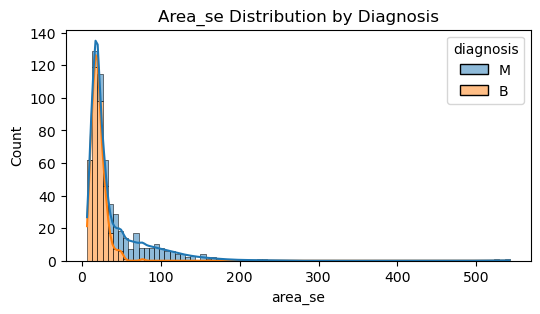

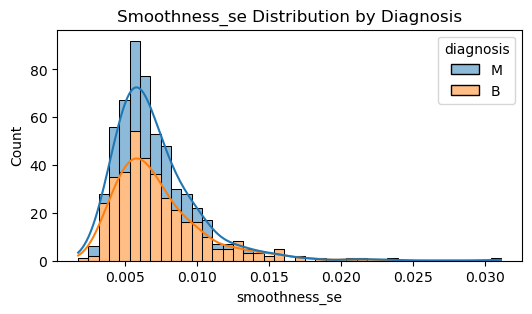

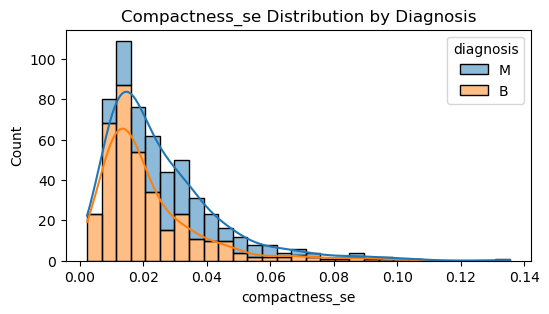

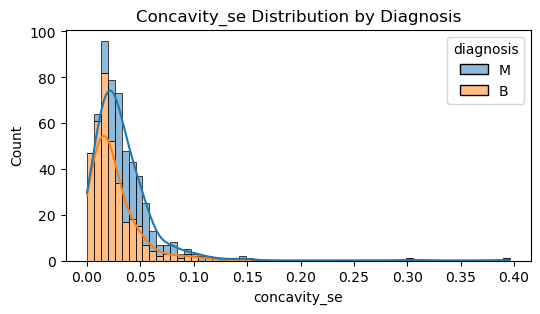

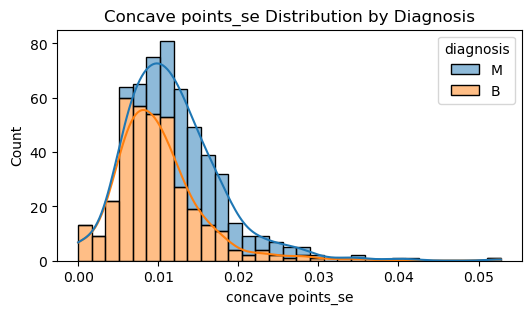

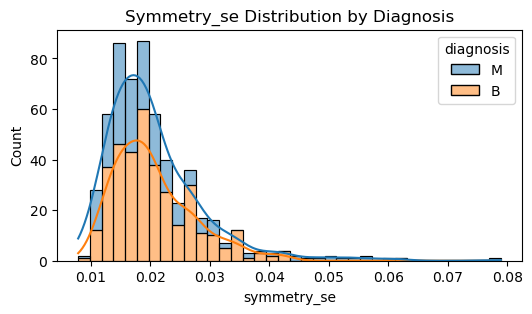

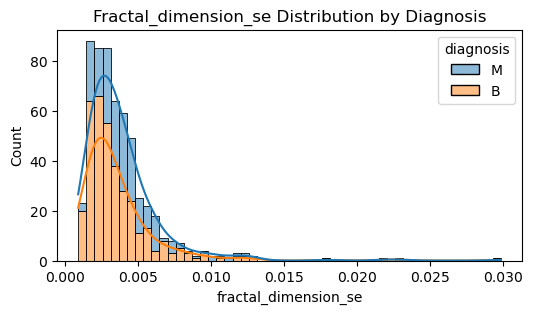

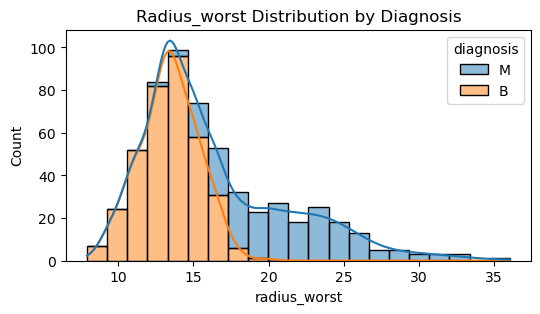

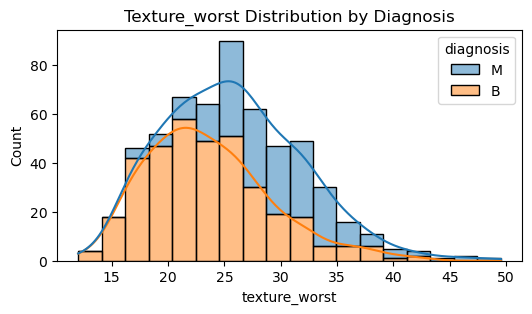

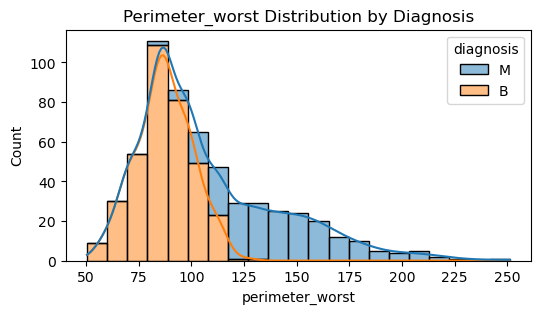

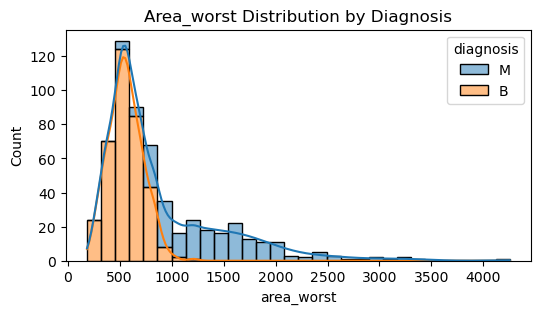

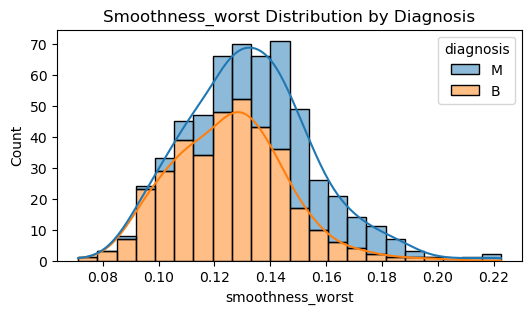

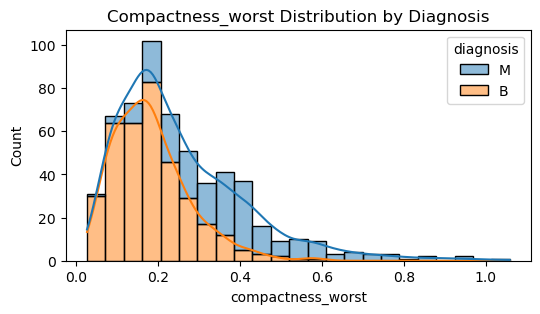

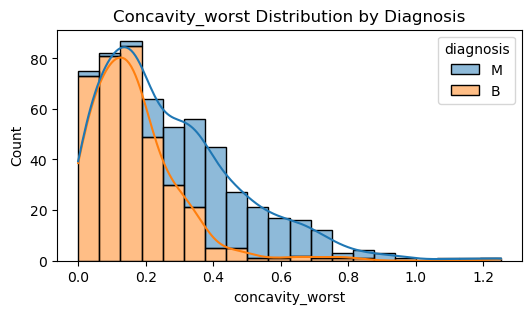

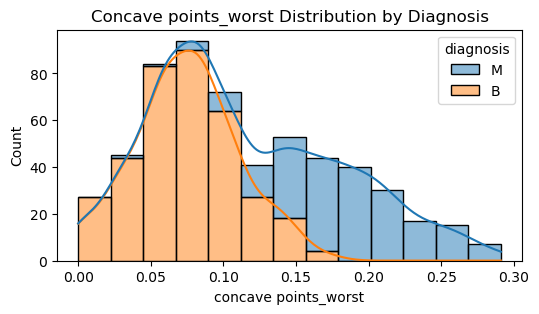

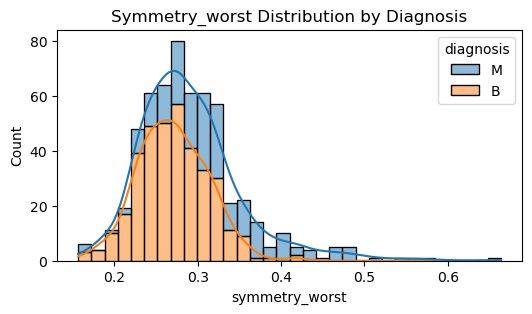

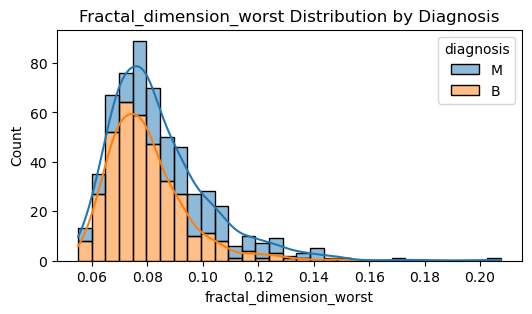

In [9]:
# Compare feature distributions between malignant and benign samples
selected_features = data.drop(['id', 'diagnosis'], axis=1)
for feature in selected_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=data, x=feature, hue='diagnosis', kde=True, multiple='stack')
    plt.title(f'{feature.capitalize()} Distribution by Diagnosis')
    plt.show()

## Data Preprocessing

In [10]:
# Drop unnecessary columns
data = data.drop(['id'], axis=1)

# Split the data into features (X) and target variable (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [11]:
# Create a DataFrame from the feature matrix and target variable
feature_names = data.columns[0] + data.columns[2:]

# Create a DataFrame from the feature matrix and target variable
df = pd.DataFrame(X, columns=feature_names)
df['diagnosis'] = y

# Calculate the Z-scores for each feature
z_scores = (df[feature_names] - df[feature_names].mean()) / df[feature_names].std()

# Set the threshold for outlier detection (e.g., Z-score > 3)
threshold = 3

# Find the indices of outliers based on the Z-scores
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Count the number of outliers
num_outliers = len(outlier_indices[0])

# Print the number of outliers
print("Number of outliers:", num_outliers)

# Remove outliers from the dataset
df_cleaned = df.drop(outlier_indices[0])

# Separate the cleaned dataset into X_cleaned and y_cleaned
X_cleaned = df_cleaned[feature_names].values
y_cleaned = df_cleaned['diagnosis'].values

Number of outliers: 0


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

## Model Training and Evaluation

In [13]:
# Initialize the SVM classifier
svm = SVC()

# Train the classifier
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

# Convert target variable to binary format
y_test_binary = np.where(y_test == 'M', 1, 0)
y_pred_binary = np.where(y_pred == 'M', 1, 0)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_binary, y_pred_binary)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
ROC AUC Score: 0.9697019325253848


In [14]:
# Display classification report
target_names = ['B', 'M']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



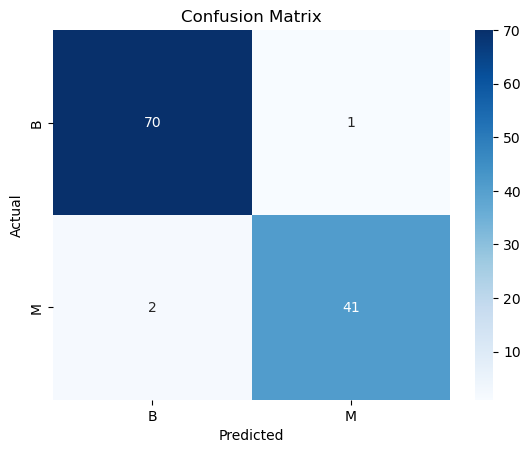

In [15]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

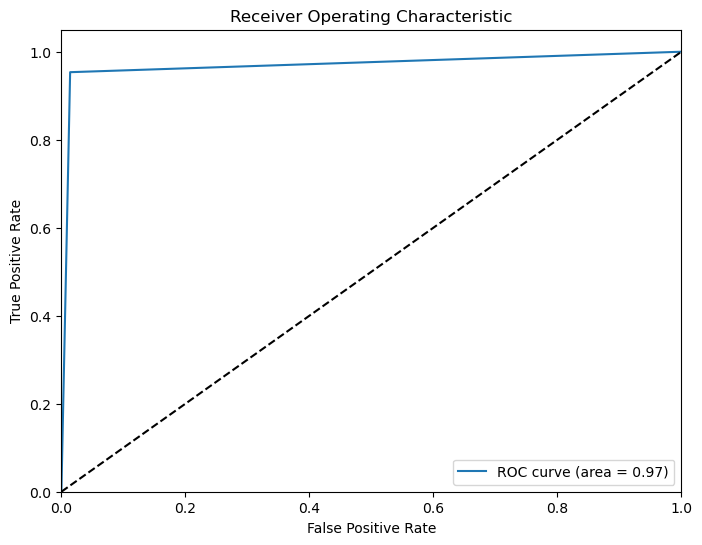

In [16]:
# Calculate the false positive rate and true positive rate for ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Hyperparameter Tuning

In [17]:
# Define the hyperparameters and their respective values to explore
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}

# Initialize the SVM classifier
svm = SVC()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the classifier using the best hyperparameters
svm_best = SVC(**best_params, probability=True)
svm_best.fit(X_train_scaled, y_train)

# Make predictions using the best model
y_pred_best = svm_best.predict(X_test_scaled)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, pos_label='M')
recall_best = recall_score(y_test, y_pred_best, pos_label='M')
f1_best = f1_score(y_test, y_pred_best, pos_label='M')

# Encode the labels as integers
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_best_encoded = label_encoder.transform(y_pred_best)

# Calculate the ROC AUC score
roc_auc_best = roc_auc_score(y_test_encoded, y_pred_best_encoded)

# Print the evaluation metrics for the best model
print("Best Model - Accuracy:", accuracy_best)
print("Best Model - Precision:", precision_best)
print("Best Model - Recall:", recall_best)
print("Best Model - F1 Score:", f1_best)
print("Best Model - ROC AUC Score:", roc_auc_best)

Best Hyperparameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Model - Accuracy: 0.9736842105263158
Best Model - Precision: 0.9761904761904762
Best Model - Recall: 0.9534883720930233
Best Model - F1 Score: 0.9647058823529412
Best Model - ROC AUC Score: 0.9697019325253848


#### It seems that the performane before and after the hyperparameter tunning is similar.

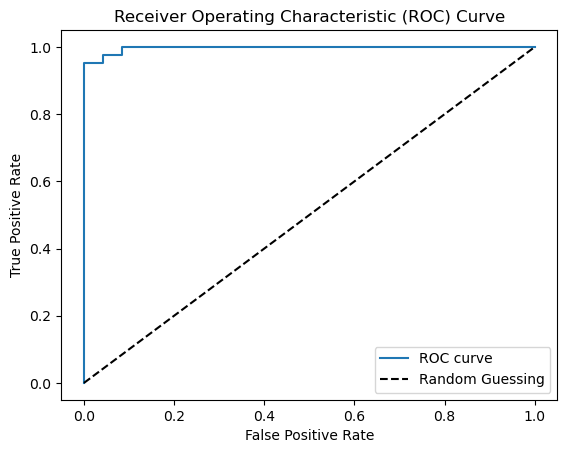

In [18]:
# Calculate the predicted probabilities for positive class
y_pred_proba_best = svm_best.predict_proba(X_test_scaled)[:, 1]

# Compute the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba_best)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

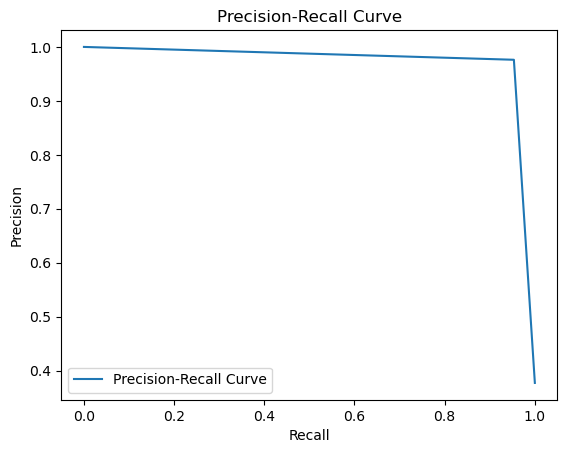

In [19]:
# Map the labels to numeric values
label_mapping = {'B': 0, 'M': 1}
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)
y_pred_binary = le.transform(y_pred)

# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_binary)

# Plot Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

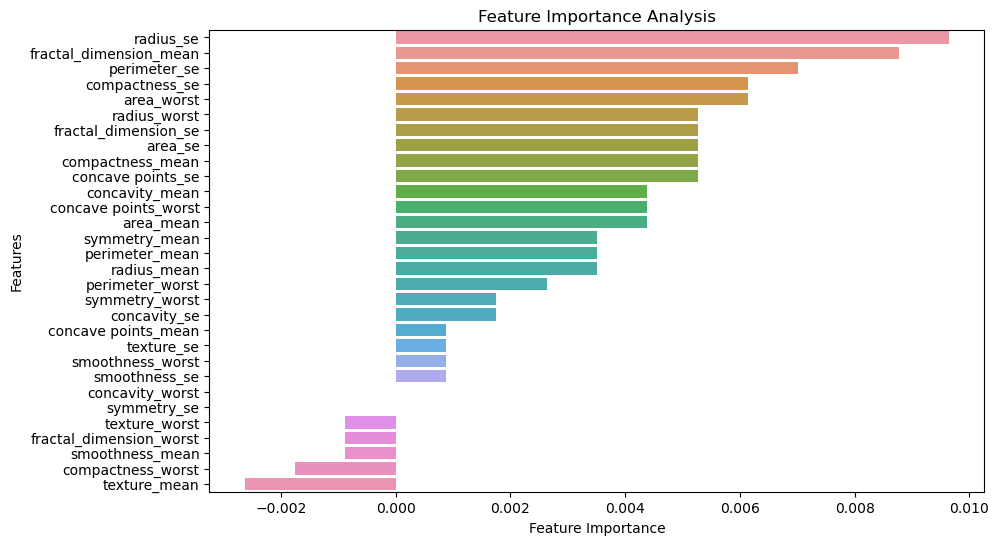

In [20]:
# Perform permutation importance analysis
result = permutation_importance(svm_best, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Assuming X is a pandas DataFrame containing the features
feature_names = X.columns

# Get sorted feature importance indices
sorted_indices = np.argsort(result.importances_mean)[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importance = result.importances_mean[sorted_indices]

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

In [21]:
# Cases where the model made incorrect predictions
incorrect_predictions = X_test[y_test != y_pred]
print("No.of incorrect predictions", len(incorrect_predictions))

No.of incorrect predictions 3


## Model Saving & Predictions

In [22]:
# Save the trained model using pickle or joblib
joblib.dump(svm, 'best_model.joblib')

['best_model.joblib']

In [23]:
# Load the saved model for future use
loaded_model = joblib.load('best_model.joblib')

# Make predictions using the loaded model
new_data = [[12.36, 21.8, 79.78, 466.1, 0.08772, 0.09445, 0.06015, 0.03745, 0.193, 0.06404,
             0.2978, 1.502, 2.203, 20.95, 0.007112, 0.02493, 0.02703, 0.01293, 0.01958, 
             0.004463, 13.83, 30.5, 91.46, 574.7, 0.1304, 0.2463, 0.2434, 0.1205, 0.2972, 0.09261],
           [17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
            1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
            25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189],
           [12.79, 11.38, 110.8, 900, 0.284, 0.276, 0.205, 0.285, 0.214, 0.3633,
            1.0, 0.808, 8.201, 122.4, 0.00360, 0.01210, 0.0851, 0.0623, 0.02101, 0.0051201,
            23.36, 12.22, 150.6, 2020, 0.1502, 0.4201, 0.6201, 0.2001, 0.3024, 0.2011]
           ]


# Fit the loaded model with training data
loaded_model.fit(X_train_scaled, y_train)

# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)

new_data_scaled = scaler.transform(new_data)
predictions = loaded_model.predict(new_data_scaled)
print(predictions)

['B' 'M' 'M']


## 📝 Project Report Summary 📊

This report summarizes the project, methodology, and results. The goal of the project was to develop a predictive model using SVM (Support Vector Machine) and analyze its performance.

#### 🔧 Methodology 🔬

Data Collection: Collected relevant data from reliable sources.
Data Preprocessing: Handled missing values, outliers, and inconsistencies.
Feature Selection: Selected important features based on correlation and importance.
Model Training: Trained SVM model using the preprocessed data.
Model Evaluation: Evaluated model performance using metrics like accuracy, precision, recall, and F1 score.
Feature Importance Analysis: Analyzed feature importance using techniques like permutation importance.

#### 📊 Results 📈

SVM model achieved **97.3 %** accuracy on the test set.
Best hyperparameters were obtained through grid search.
Feature **radius_se**, Feature **fractal_dimension_mean**, and feature **perimeter_se** had the highest impact on predictions.

## Conclusion

In conclusion, the project successfully developed a predictive model using SVM. The methodology covered data preprocessing, model training, evaluation, and feature importance analysis. The results demonstrated the model's accuracy and highlighted key features influencing the predictions.

Potential areas for future work include exploring other algorithms, conducting extensive feature engineering, increasing the dataset size, and analyzing misclassified instances for model improvement.

Overall, the project contributes to understanding the problem and can guide decision-making processes related to the predicted outcome.